<a href="https://colab.research.google.com/github/dayananikol/CCMACLRL_EXERCISES_COM221ML/blob/main/exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [818]:
import pandas as pd
from sklearn.metrics import log_loss
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import ConfusionMatrixDisplay

## Dataset File

In [819]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)

In [820]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [822]:
df.drop(columns=['Name'], inplace=True)

In [823]:
df.duplicated().sum()

0

In [824]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [825]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [826]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [827]:
df = df[['Survived', 'Age', 'Sex', 'Pclass', 'Embarked', 'Parch']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Embarked,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,S,0,False,True,False,False,True
1,1,38.0,C,0,True,False,True,False,False
2,1,26.0,S,0,True,False,False,False,True
3,1,35.0,S,0,True,False,True,False,False
4,0,35.0,S,0,False,True,False,False,True


In [828]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [829]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

In [830]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Age         889 non-null    float64
 2   Embarked    889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Sex_female  889 non-null    bool   
 5   Sex_male    889 non-null    bool   
 6   Pclass_1    889 non-null    bool   
 7   Pclass_2    889 non-null    bool   
 8   Pclass_3    889 non-null    bool   
dtypes: bool(5), float64(1), int64(3)
memory usage: 39.1 KB


In [831]:
df.head()

,Survived,Age,Embarked,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,0,False,True,False,False,True
1,1,38.0,1,0,True,False,True,False,False
2,1,26.0,0,0,True,False,False,False,True
3,1,35.0,0,0,True,False,True,False,False
4,0,35.0,0,0,False,True,False,False,True


In [832]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [833]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [834]:
model.score(x_test, y_test)

0.8370786516853933

In [835]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7919253475528472

In [836]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[97, 13],
       [16, 52]])

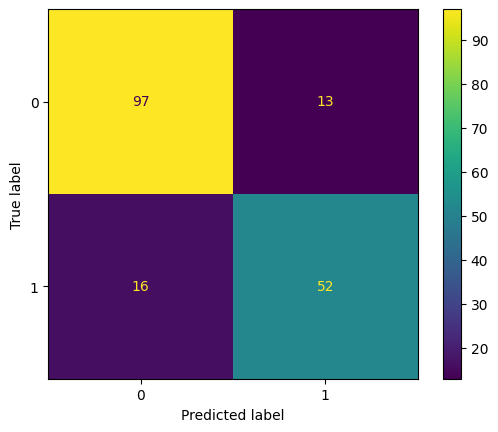

In [837]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

In [838]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.80      0.76      0.78        68

    accuracy                           0.84       178
   macro avg       0.83      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178



In [839]:
female = [[30, 1, 0, 1, 0, 0,1,0]]
model.predict(female)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [840]:
probability = model.predict_proba(female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 83.1%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [841]:
male = [[32, 0, 1, 0, 0, 1, 0, 0]]
probability = model.predict_proba(male)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 71.2%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Test File

In [842]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [843]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [844]:
dt.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [845]:
dt['Age'].fillna(dt['Age'].median(), inplace=True)

In [846]:
dt = dt[['Age', 'Sex', 'Pclass', 'Embarked', 'Parch']]
dt = pd.get_dummies(dt, columns=['Sex', 'Pclass'])
dt['Embarked'] = dt['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
dt.dropna(inplace=True)
dt.head()

,Age,Embarked,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,34.5,2,0,False,True,False,False,True
1,47.0,0,0,True,False,False,False,True
2,62.0,2,0,False,True,False,True,False
3,27.0,0,0,False,True,False,False,True
4,22.0,0,1,True,False,False,False,True


In [847]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   Embarked    418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Sex_female  418 non-null    bool   
 4   Sex_male    418 non-null    bool   
 5   Pclass_1    418 non-null    bool   
 6   Pclass_2    418 non-null    bool   
 7   Pclass_3    418 non-null    bool   
dtypes: bool(5), float64(1), int64(2)
memory usage: 12.0 KB


## Sample Submission File

In [848]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [849]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('results.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
